# Generating Cosmic Microwave Background (CMB) temperature anisotropy maps from arbitrary angular power spectrum

In [4]:
import os
import sys
import numpy as np
import healpy as hp

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
import gencmb
import reconcmb

In [6]:
# Inuput and output folders
data = '../data/'
out = '../output/'

### Just some matplotlib and seaborn parameter tuning

In [7]:
# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

### Load input angular power spectrum

In [8]:
ell, ClTT, DlTT = gencmb.load_spectrum(fname='CAMB_real_scalCls.dat', lmax=2500)

### Set parameters for SYNFAST

In [36]:
# Set FWHM and sigma coefficients to match with Planck's
# instruemntal parameters. Since all frequency range have different
# FWHM and sigma values, I only gave here an approximate average for them.
#
# This info can be found here:
# - https://wiki.cosmos.esa.int/planck-legacy-archive/index.php/Beams_LFI
# - https://wiki.cosmos.esa.int/planckpla/index.php/Effective_Beams
fwhm_arcmin = 3
fwhm = np.deg2rad(fwhm_arcmin / 60)

sigma_arcmin = 0.50
sigma = np.deg2rad(sigma_arcmin / 60)

### Generate a random HEALPix dataset using SYNFAST

In [41]:
maps = gencmb.gen_maps(ClTT, N_SIDE=2048, lmax=None, pol=False, pixwin=False, fwhm=fwhm, sigma=sigma)

### Map HEALPix dataset to a geographical projection and visualize it

In [42]:
hpx_proj = reconcmb.get_projection(maps, proj='moll', N_SIDE=2048)

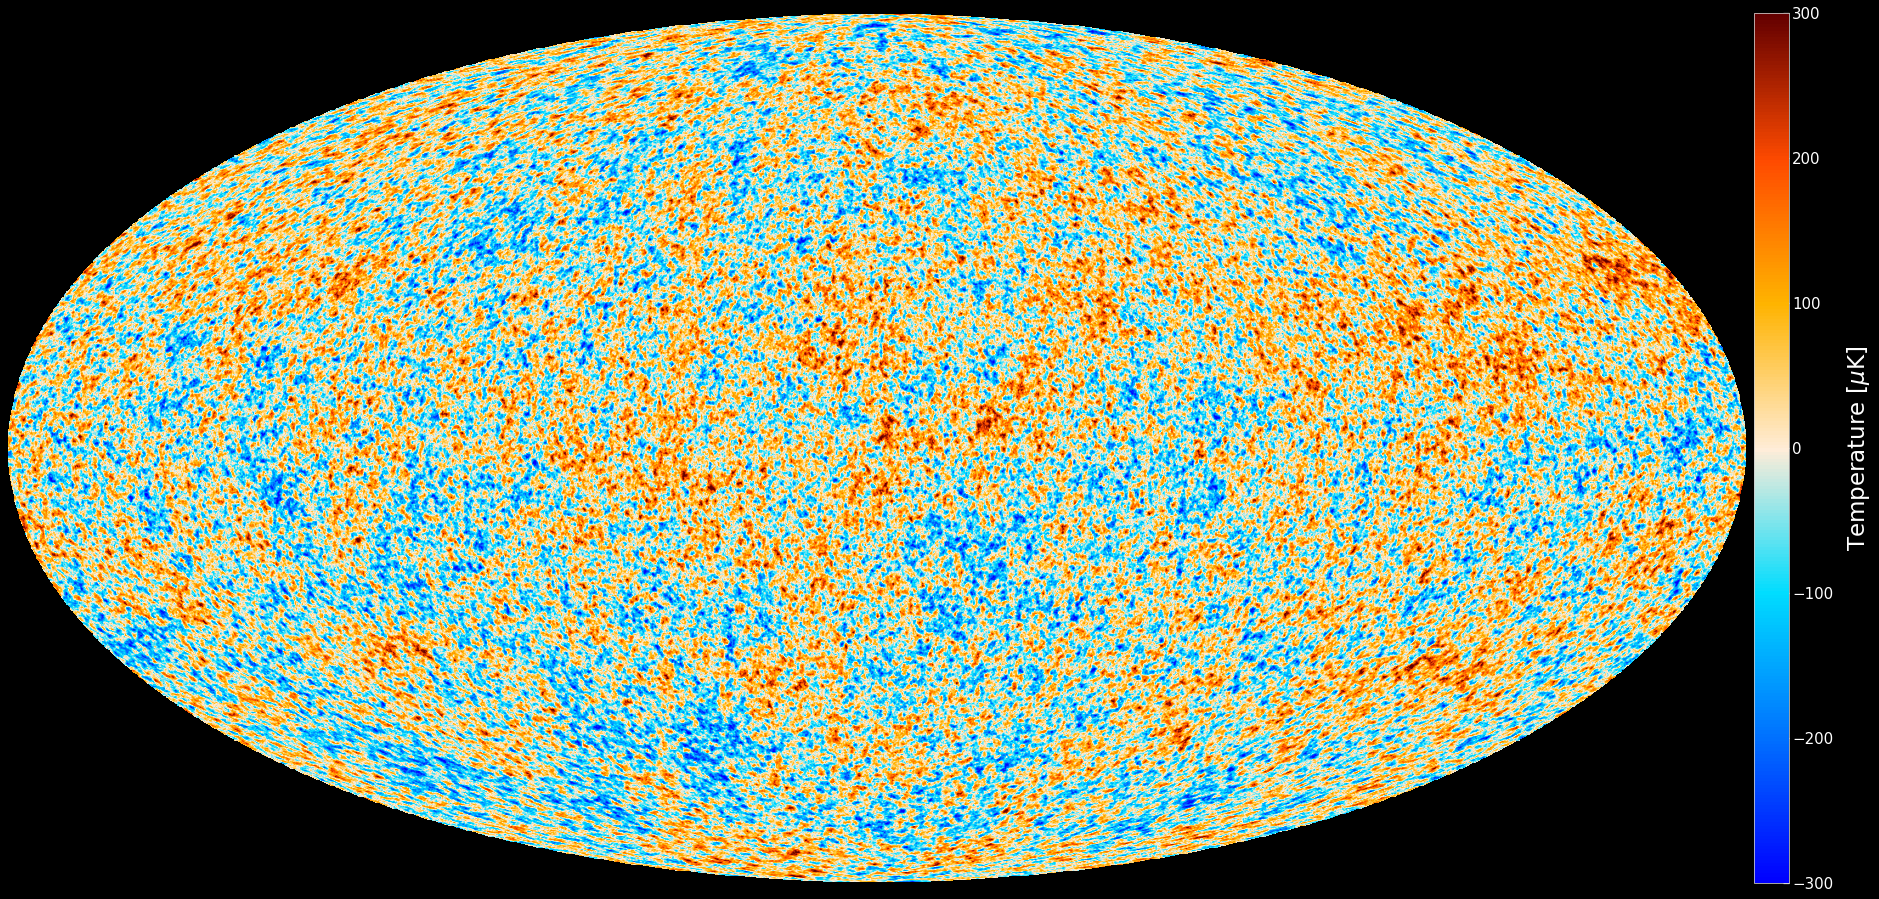

In [43]:
reconcmb.plot_cmb(proj=hpx_proj, cmap=None, c_min=-300, c_max=300,
                  save=False, save_filename='CMB_HEALPix_sim_5.png')

### Reconstruct angular power spectrum from generated dataset

In [44]:
ell, Cl, Dl = reconcmb.cmb_spectrum(maps, lmax=2500, alm=False)

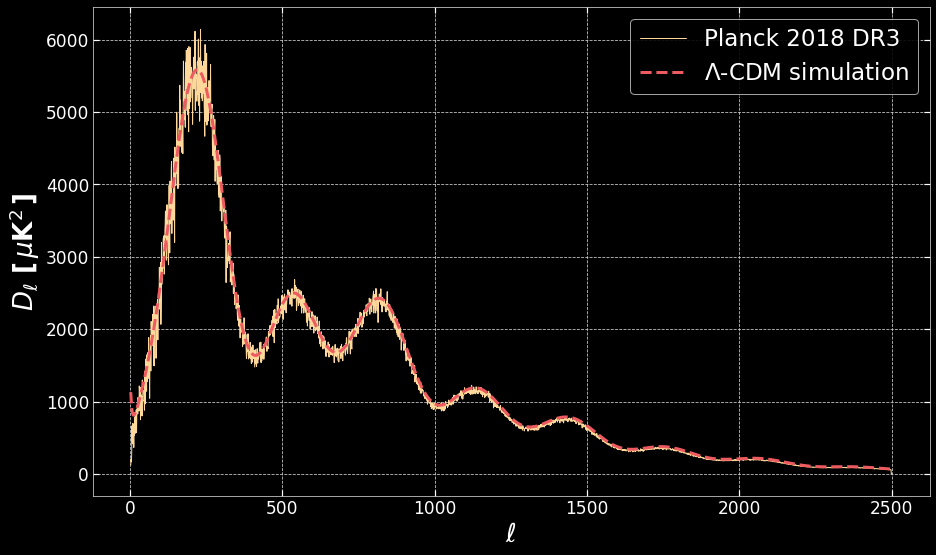

In [45]:
reconcmb.plot_spectrum(ell, Dl, DlTT,
                       save=False, save_filename='default_name_spectrum')